# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load Dataset

In [2]:
data = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
data.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'counts')

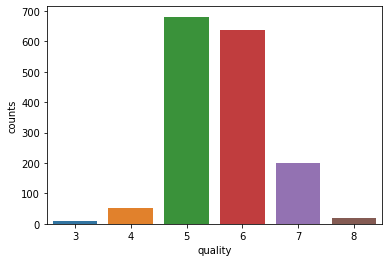

In [7]:
counts = data.quality.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('quality')
plt.ylabel('counts')

In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data['quality']=data.quality.apply(lambda x:1 if x>=7 else 0)
data.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [10]:
data.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [11]:
X = data.drop('quality',axis=1)
y = data['quality']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [13]:
y_train.value_counts()

0    1103
1     176
Name: quality, dtype: int64

In [14]:
y_test.value_counts()

0    279
1     41
Name: quality, dtype: int64

# Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Function

In [16]:
def func(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(pred, y_test)
    print('Test Accuracy : {:.2f}%'.format(acc*100))
    print(classification_report(y_test, pred))
    cf_matrix = confusion_matrix(y_test, pred)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    return acc

# Logistic Regression

Test Accuracy : 86.56%
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       279
           1       0.45      0.24      0.32        41

    accuracy                           0.87       320
   macro avg       0.68      0.60      0.62       320
weighted avg       0.84      0.87      0.85       320



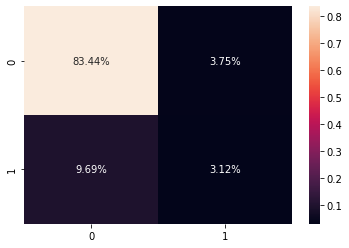

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
acc_log_reg = func(log_reg)

# Decision Tree Classifier

Test Accuracy : 86.88%
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       279
           1       0.48      0.39      0.43        41

    accuracy                           0.87       320
   macro avg       0.70      0.66      0.68       320
weighted avg       0.86      0.87      0.86       320



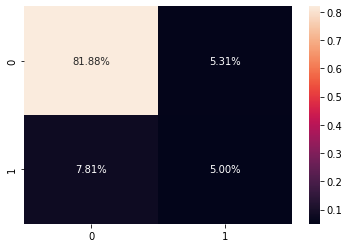

In [18]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()
acc_dtc = func(model_dtc)

# Random Forest Classifier

Test Accuracy : 89.06%
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       279
           1       0.62      0.37      0.46        41

    accuracy                           0.89       320
   macro avg       0.77      0.67      0.70       320
weighted avg       0.88      0.89      0.88       320



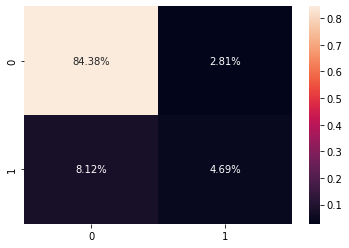

In [19]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
acc_rfc = func(model_rfc)

# SVC

Test Accuracy : 89.38%
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       279
           1       0.77      0.24      0.37        41

    accuracy                           0.89       320
   macro avg       0.83      0.62      0.66       320
weighted avg       0.88      0.89      0.87       320



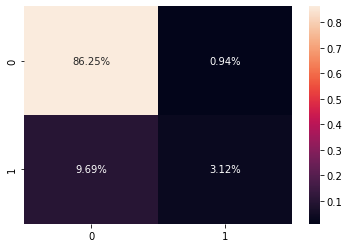

In [20]:
from sklearn.svm import SVC
model_SVC = SVC()
acc_SVC = func(model_SVC)

# SGDClassifier

Test Accuracy : 87.50%
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       279
           1       0.52      0.29      0.38        41

    accuracy                           0.88       320
   macro avg       0.71      0.63      0.65       320
weighted avg       0.85      0.88      0.86       320



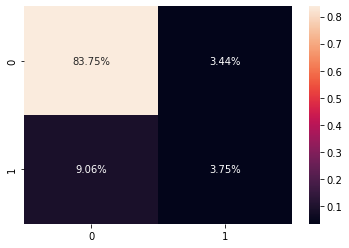

In [21]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
acc_clf=func(clf)

# Adaboost Classifier

Test Accuracy : 86.25%
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       279
           1       0.45      0.32      0.37        41

    accuracy                           0.86       320
   macro avg       0.68      0.63      0.65       320
weighted avg       0.85      0.86      0.85       320



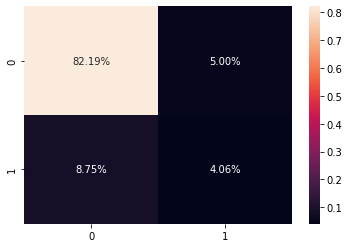

In [22]:
from sklearn.ensemble import AdaBoostClassifier
model_adaB = AdaBoostClassifier()
acc_adaB=func(model_adaB)

# KNeighbors Classifier

Test Accuracy : 86.88%
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       279
           1       0.48      0.32      0.38        41

    accuracy                           0.87       320
   macro avg       0.69      0.63      0.65       320
weighted avg       0.85      0.87      0.86       320



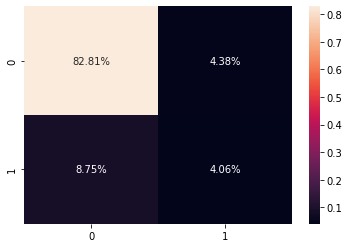

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model_neigh = KNeighborsClassifier()
acc_neigh = func(model_neigh)

# ExtraTreesClassifier

Test Accuracy : 90.94%
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       279
           1       0.80      0.39      0.52        41

    accuracy                           0.91       320
   macro avg       0.86      0.69      0.74       320
weighted avg       0.90      0.91      0.90       320



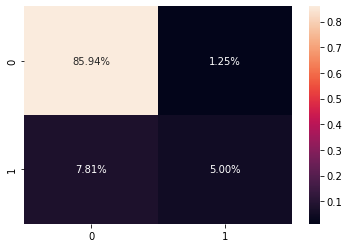

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
model_xtc = ExtraTreesClassifier()
acc_xtc = func(model_xtc)

# BaggingClassifier

Test Accuracy : 87.50%
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       279
           1       0.52      0.41      0.46        41

    accuracy                           0.88       320
   macro avg       0.72      0.68      0.69       320
weighted avg       0.86      0.88      0.87       320



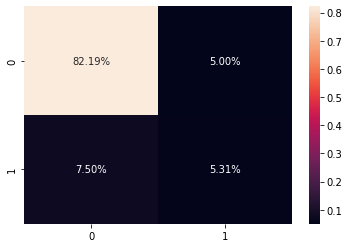

In [25]:
from sklearn.ensemble import BaggingClassifier
model_bc = BaggingClassifier()
acc_bc = func(model_bc)

# GaussianNB

Test Accuracy : 84.38%
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       279
           1       0.42      0.61      0.50        41

    accuracy                           0.84       320
   macro avg       0.68      0.74      0.70       320
weighted avg       0.87      0.84      0.86       320



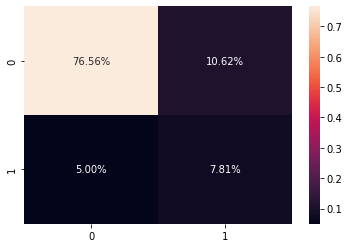

In [26]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
acc_GNB = func(model_GNB)

# LinearDiscriminantAnalysis

Test Accuracy : 85.94%
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       279
           1       0.43      0.32      0.37        41

    accuracy                           0.86       320
   macro avg       0.67      0.63      0.64       320
weighted avg       0.84      0.86      0.85       320



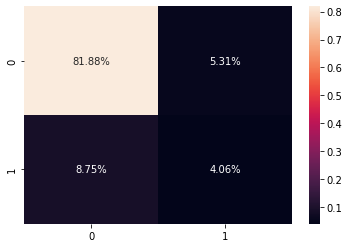

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_LDA = LinearDiscriminantAnalysis()
acc_LDA = func(model_LDA)

# Gradient Boosting for classification

Test Accuracy : 87.19%
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       279
           1       0.50      0.39      0.44        41

    accuracy                           0.87       320
   macro avg       0.71      0.67      0.68       320
weighted avg       0.86      0.87      0.86       320



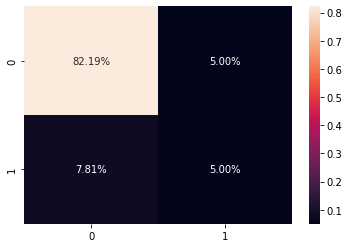

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
model_GBC = GradientBoostingClassifier()
acc_GBC = func(model_GBC)

# Final Report

In [29]:
output = pd.DataFrame({"Model":['Logistic Regression','Decision Tree Classifier','Random Forest Classifier',
                                'SVC','SGD Classifier','AdaBoost Classifier','KNeighbors Classifier',
                               'Extra Trees Classifier','Bagging Classifier','Gaussian NB',
                               'Linear Discriminant Analysis','Gradient Boosting for classification'],
                      "Accuracy":[acc_log_reg, acc_dtc, acc_rfc, acc_SVC, acc_clf, acc_adaB,
                                 acc_neigh, acc_xtc, acc_bc, acc_GNB, acc_LDA, acc_GBC]})

In [30]:
output

,Model,Accuracy
0,Logistic Regression,0.865625
1,Decision Tree Classifier,0.868750
2,Random Forest Classifier,0.890625
3,SVC,0.893750
4,SGD Classifier,0.875000
5,AdaBoost Classifier,0.862500
6,KNeighbors Classifier,0.868750
7,Extra Trees Classifier,0.909375
8,Bagging Classifier,0.875000
9,Gaussian NB,0.843750


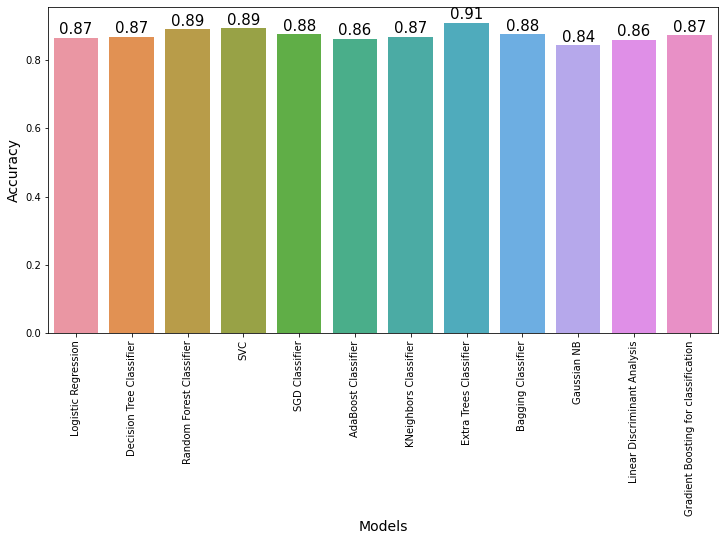

In [31]:
plt.figure(figsize=(12, 6))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=90);
plt.ylabel("Accuracy", size=14)
plt.show()